In [1]:
import matplotlib.pyplot as plt

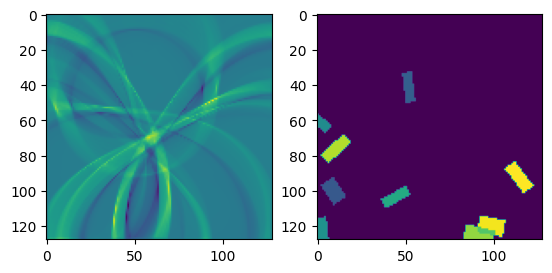

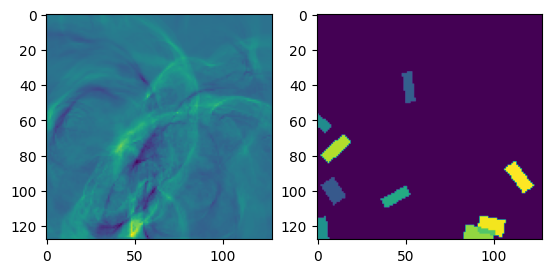

In [4]:
from wavebench.dataloaders.rtc_loader import get_dataloaders_rtc_thick_lines

for medium_type in ['gaussian_lens', 'gaussian_random_field']:
  loaders = get_dataloaders_rtc_thick_lines(
    medium_type=medium_type#'gaussian_lens'
  )

  idx = 1
  a, b = loaders['train'].dataset.__getitem__(idx)

  fig, axes = plt.subplots(1, 2)

  axes[0].imshow(a.squeeze().numpy())
  axes[1].imshow(b.squeeze().numpy())

In [5]:
from wavebench.dataloaders.is_loader import get_dataloaders_is_thick_lines


for medium_type in ['gaussian_lens', 'gaussian_random_field']:
  loaders = get_dataloaders_is_thick_lines(
    medium_type=medium_type#'gaussian_lens'
  )


  idx = 1
  a, b = loaders['train'].dataset.__getitem__(idx)


  fig, axes = plt.subplots(1, 2)

  axes[0].imshow(a.squeeze().numpy())
  axes[1].imshow(b.squeeze().numpy())